<a href="https://colab.research.google.com/github/manishmcsa/CNN_EMNIST_Split_mnist_no_fc_model/blob/main/CNN_EMNIST_split_byclass_NO_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Importing Libraries
import torch # Importing Pytorch library
import torch.nn as nn # import torch library for neyral nets
import torch.nn.functional as F # Importing torch library for performing arthmetic 
import torch.optim as optim  # implementing various optimization algorithms
import torchvision as torchvision
from torchvision import datasets, transforms # package consists of popular datasets, model architectures, and common image transformations for computer vision

In [2]:
#Building Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) #input = 28*28*1  OUtput - 26*26*10        
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) #input = 26*26*10  OUtput - 24*24*10   
        self.pool1 = nn.MaxPool2d(2, 2) #Input :24*24*10  Output : 12*12*10 Receptive field - 10*10                   
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) #input = 12*12*10  OUtput - 10*10*20   
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) #input = 10*10*20  OUtput - 8*8*20     
        self.pool2 = nn.MaxPool2d(2, 2) #Input : 8*8*20   Output: 4*4*20                                              
        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) #input = 4*4*20  OUtput - 2*2*30 
        self.pool3 = nn.AvgPool2d(2, 2) # Input: 2*2*30 Ouput:1*1*30 
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=62, kernel_size=1) #input = 1*1*30  OUtput - 1*1*62

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) # forward activation function using relu
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))) # forward activation function using relu
        x = self.pool3((F.relu(self.conv5(x)))) # forward activation function using relu
        x = self.conv6(x) # forward activation function using relu
        x = x.view(-1, 62) # reshape tensor for -1 is nu,mber of rows and 10 is column value i.e. predictions
        return F.log_softmax(x)

In [3]:
# undesratnding and printing the network structure and summary
!pip install torchsummary # package to print model summary
from torchsummary import summary # package to print model summary
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
model=Net().to(device) #sending model to GPU
summary(model, input_size=(1, 28, 28)) # printing model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
         MaxPool2d-3           [-1, 10, 12, 12]               0
            Conv2d-4           [-1, 20, 10, 10]           1,820
            Conv2d-5             [-1, 20, 8, 8]           3,620
         MaxPool2d-6             [-1, 20, 4, 4]               0
            Conv2d-7             [-1, 30, 2, 2]           5,430
         AvgPool2d-8             [-1, 30, 1, 1]               0
            Conv2d-9             [-1, 62, 1, 1]           1,922
Total params: 13,802
Trainable params: 13,802
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.05
Estimated Total Size (MB): 0.19
---------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [4]:
#torch.manual_seed(1)
batch_size = 256 # initializing batch size

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # defining data dictionary of specified arguments
# Download Trainset

train_loader = torch.utils.data.DataLoader(                 # downloading the train dataset
    datasets.EMNIST('../data', train=True, download=True,split='byclass',
    transform=transforms.Compose([
                                 transforms.ToTensor()
    ])
                    ),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/EMNIST/raw/emnist.zip to ../data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [5]:
batch = next(iter(train_loader)) # defining the itererator to get 1batch of image sequentially
images,labels=batch              # mapping imgaes and labels in batch
labels.shape,images.shape

(torch.Size([256]), torch.Size([256, 1, 28, 28]))

labels: tensor([ 9,  4, 19, 24, 24,  3,  4, 49, 30, 53,  2, 36, 56, 12, 22,  6, 36,  0,
         9, 28, 47, 58,  6, 15, 60,  6, 29, 40,  1,  6, 55,  3, 18,  9, 43,  4,
        36, 28, 40, 23,  9, 50,  4,  0,  0,  4, 33, 41,  2, 15,  5,  3,  5, 47,
         1,  3, 24,  8,  5, 24,  8,  8, 46,  4,  5,  4,  8, 30,  8, 49, 39,  5,
         7,  1, 40, 52,  7,  6,  5, 60, 46, 43,  6, 30,  9,  6,  8, 18,  6,  4,
        28, 25, 27, 40,  2, 15,  1,  2, 24, 36,  5, 21,  3, 24, 22,  9, 36,  6,
         2,  9, 26, 24,  7,  6,  1, 25,  8,  5, 54, 26,  6,  5, 36, 19, 36,  9,
         3, 28, 31, 40,  2,  8,  1, 47, 60,  3, 12,  1,  5,  2, 12,  0, 47, 33,
         8, 10,  1,  2, 53,  9,  1,  8,  7,  5, 53,  6, 24, 39,  1,  7,  1,  0,
         1, 13, 30, 55,  2,  9, 51,  4, 55, 33,  6,  3, 33, 10,  1, 55,  8, 23,
        31,  7, 47,  5,  4, 39,  5,  8,  5, 52,  9,  6, 13, 21, 47, 56, 56, 40,
        36, 42,  0, 36, 39, 12, 47, 24, 24,  5, 23,  8,  6,  3, 53, 51, 18,  0,
         5,  0,  7,  5,  8, 40, 

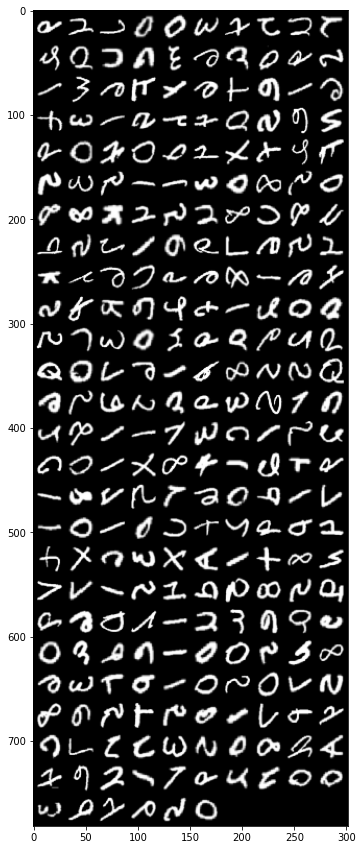

In [6]:
import matplotlib.pyplot as plt    #importing library to plot
import numpy as np                 # importing numpy library
grid = torchvision.utils.make_grid(images, nrow=10) # making grid of images with 10 rows
plt.figure(figsize=(15,15)) # dfeining the size of image to plot
plt.imshow(np.transpose(grid, (1,2,0))) # plot/how the image
print('labels:', labels) # printing the labels

In [7]:
# getting the number of correct prediction w.r.t to labels
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item() # pred.argmax will give value of highest prob of value predicted and compares with labels, 
                                                     # sum will keep adding the correct values and item will give the result of sum

In [8]:
#train_loader = torch.utils.data.DataLoader(train_loader, batch_size=batch_size)
network=Net()           # creating object of Network class
optimizer = optim.Adam(network.parameters(), lr=0.01) #initializing optimizer

for epoch in range(20): # loopng epoches

    total_loss = 0                      #Initializing variable to calculate total loss
    total_correct = 0                   #Initializing variable to calculate total correct

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images,labels=images.to(device),labels.to(device) # mapping image and labels data to GPU
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()  #zero_grad() is to restart looping without losses from last step during training model 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item() # calculate total loss in an epoch
        total_correct += get_num_correct(preds, labels)  #calculate total correct in an epoch training
        acuracy=total_correct/814255

    print(                                          #printing epochwise total loss and total correct w.r.t labels
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss,
        "Accuracy", acuracy
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct: 523175 loss: 2149.889099150896 Accuracy 0.6425198494329172
epoch 1 total_correct: 563193 loss: 1548.143034607172 Accuracy 0.6916666154951459
epoch 2 total_correct: 568646 loss: 1475.8834438025951 Accuracy 0.6983635347649078
epoch 3 total_correct: 570451 loss: 1451.9278604388237 Accuracy 0.7005802850458395
epoch 4 total_correct: 571824 loss: 1435.4992637634277 Accuracy 0.7022664889991465
epoch 5 total_correct: 572925 loss: 1419.5095372796059 Accuracy 0.7036186452646898
epoch 6 total_correct: 573341 loss: 1413.2199439108372 Accuracy 0.7041295417283283
epoch 7 total_correct: 574486 loss: 1400.112777620554 Accuracy 0.7055357351198335
epoch 8 total_correct: 574877 loss: 1392.1942848861217 Accuracy 0.7060159286709937
epoch 9 total_correct: 575374 loss: 1388.520638525486 Accuracy 0.7066263025710618
epoch 10 total_correct: 575101 loss: 1384.683776319027 Accuracy 0.7062910267667991
epoch 11 total_correct: 575493 loss: 1382.2891292273998 Accuracy 0.7067724484344585
epoch 1